In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import warnings; warnings.filterwarnings("ignore")

In [2]:
file_path = 'fao_data_crops_data.csv'
df = pd.read_csv(file_path)

# check all the categories
if 'category' in df.columns:
    unique_categories = df['category'].unique()
    print("categories are：")
    for entry in unique_categories:
        print(entry)
else:
    print("there is no column named 'category'")

categories are：
agave_fibres_nes
almonds_with_shell
anise_badian_fennel_corian
apples
apricots
arecanuts
artichokes
asparagus
avocados
bambara_beans
bananas
barley
beans_dry
beans_green
berries_nes
blueberries
brazil_nuts_with_shell
broad_beans_horse_beans_dry
buckwheat
cabbages_and_other_brassicas
canary_seed
carobs
carrots_and_turnips
cashew_nuts_with_shell
cashewapple
cassava
castor_oil_seed
cauliflowers_and_broccoli
cereals_nes
cereals_rice_milled_eqv
cereals_total
cherries
chestnuts
chick_peas
chicory_roots
chillies_and_peppers_dry
chillies_and_peppers_green
cinnamon_canella
citrus_fruit_nes
citrus_fruit_total
cloves
coarse_grain_total
cocoa_beans
coconuts
coffee_green
coir
cow_peas_dry
cranberries
cucumbers_and_gherkins
currants
dates
eggplants_aubergines
fibre_crops_nes
fibre_crops_primary
figs
flax_fibre_and_tow
fonio
fruit_excl_melons_total
fruit_fresh_nes
fruit_tropical_fresh_nes
garlic
ginger
gooseberries
grapefruit_inc_pomelos
grapes
groundnuts_with_shell
gums_natural
hazel

In [3]:
print(df['category'].value_counts())

cereals_total              92976
cereals_rice_milled_eqv    37598
coarse_grain_total         36885
fruit_excl_melons_total    31254
groundnuts_with_shell      26358
                           ...  
brazil_nuts_with_shell      1087
coir                         804
kapok_fibre                  803
kapokseed_in_shell           802
gums_natural                 475
Name: category, Length: 85, dtype: int64


In [4]:
df_cereals_total = df[df['category'] == 'cereals_total']

In [5]:
df_cereals_total

,country_or_area,element,year,unit,value,category
364493,Afghanistan,Seed,2007.0,tonnes,226250.0,cereals_total
364494,Afghanistan,Seed,2006.0,tonnes,251495.0,cereals_total
364495,Afghanistan,Seed,2005.0,tonnes,248575.0,cereals_total
364496,Afghanistan,Seed,2004.0,tonnes,245015.0,cereals_total
364497,Afghanistan,Seed,2003.0,tonnes,215475.0,cereals_total
...,...,...,...,...,...,...
457464,Zimbabwe,Production Quantity,1963.0,tonnes,1030933.0,cereals_total
457465,Zimbabwe,Production Quantity,1962.0,tonnes,1225137.0,cereals_total
457466,Zimbabwe,Production Quantity,1961.0,tonnes,1266453.0,cereals_total
457467,fnSeqID,NaN,NaN,NaN,NaN,cereals_total


In [6]:
df_cereals_total['country_or_area'].unique()

array(['Afghanistan', 'Africa +', 'Albania', 'Algeria', 'Americas +',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia +',
       'Australia', 'Australia and New Zealand +', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean +',
       'Central African Republic', 'Central America +', 'Central Asia +',
       'Chad', 'Chile', 'China', 'China, mainland', 'Colombia', 'Comoros',
       'Congo', 'Congo, Democratic Republic of', 'Costa Rica',
       "C么te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa +', 'Eastern Asia +',
       'Eastern Europe +', 'Ecuador', 'Egyp

In [7]:
area_list = df_cereals_total['country_or_area'].unique()

continent_like = [x for x in area_list if x.strip().endswith('+')]

print(continent_like)

['Africa +', 'Americas +', 'Asia +', 'Australia and New Zealand +', 'Caribbean +', 'Central America +', 'Central Asia +', 'Eastern Africa +', 'Eastern Asia +', 'Eastern Europe +', 'Europe +', 'European Union +', 'LandLocked developing countries +', 'Least Developed Countries +', 'Low Income Food Deficit Countries +', 'Melanesia +', 'Micronesia +', 'Middle Africa +', 'Net Food Importing Developing Countries +', 'Northern Africa +', 'Northern America +', 'Northern Europe +', 'Oceania +', 'Small Island Developing States +', 'South America +', 'South-Eastern Asia +', 'Southern Africa +', 'Southern Asia +', 'Southern Europe +', 'Western Africa +', 'Western Asia +', 'Western Europe +', 'World +']


In [8]:
# check the production data for example 'Africa'
target_areas = [
    'Africa +',
    'Eastern Africa +',
    'Middle Africa +',
    'Northern Africa +',
    'Southern Africa +',
    'Western Africa +'
]
target_year = 2007

mask = (df_cereals_total['country_or_area'].isin(target_areas)) & (df_cereals_total['year'] == target_year) & (df_cereals_total['element'] == 'Production Quantity')
filtered_df = df_cereals_total[mask]

print(filtered_df)

          country_or_area              element    year    unit        value  \
365386           Africa +  Production Quantity  2007.0  tonnes  139821617.0   
389182   Eastern Africa +  Production Quantity  2007.0  tonnes   37194459.0   
418426    Middle Africa +  Production Quantity  2007.0  tonnes    6048886.0   
425319  Northern Africa +  Production Quantity  2007.0  tonnes   37960890.0   
440832  Southern Africa +  Production Quantity  2007.0  tonnes    9827235.0   
453991   Western Africa +  Production Quantity  2007.0  tonnes   48790147.0   

             category  
365386  cereals_total  
389182  cereals_total  
418426  cereals_total  
425319  cereals_total  
440832  cereals_total  
453991  cereals_total  


In [9]:
df_cereals_total['country_or_area'] = df_cereals_total['country_or_area'].replace('Northern America +', 'North America +')

target_continent = [
    'Africa +',
    'North America +',
    'Asia +',
    'Europe +',
    'Oceania +',
    'South America +'
]

temp = (df_cereals_total['country_or_area'].isin(target_continent)) & (df_cereals_total['element'] == 'Production Quantity')
filtered_df = df_cereals_total[temp]

# save main continents' data
filtered_df.to_csv('cereals_total_main_continents.csv', index=False)

print("done")

done


# Convert format and merge

In [10]:
import pandas as pd

df = pd.read_csv('Merge/aggregated_by_continent_sorted.csv')

# define year columns
year_cols = [col for col in df.columns if col.isdigit()]

# melt expansion
melted = df.melt(
    id_vars=['Country Name', 'Indicator Name'],
    value_vars=year_cols,
    var_name='year',
    value_name='value'
)

# pivot to make 'continent-year' as the index and indicators as columns
pivoted = melted.pivot_table(
    index=['Country Name', 'year'],
    columns='Indicator Name',
    values='value'
).reset_index()

# remove multi-index from columns
pivoted.columns.name = None

pivoted.to_csv('continent_year_indicators.csv', index=False)

print("done")

done


In [11]:
df_continent = pd.read_csv('continent_year_indicators.csv')

df_cereals = pd.read_csv('cereals_total_main_continents.csv')

df_continent['year'] = df_continent['year'].astype(str)
df_cereals['year'] = df_cereals['year'].astype(str)

# prepare the join key
def clean_name(x):
    return str(x).replace('+', '').replace(' ', '').strip().lower()

df_continent['key_name'] = df_continent['Country Name'].apply(clean_name)
df_cereals['key_name'] = df_cereals['country_or_area'].apply(clean_name)



In [12]:
def clean_year(y):
    return str(y).strip()[:4]

df_continent['year'] = df_continent['year'].apply(clean_year)
df_cereals['year'] = df_cereals['year'].apply(clean_year)

In [13]:
# merge the data
merged = pd.merge(
    df_continent,
    df_cereals[['key_name', 'year', 'value']],
    how='left',
    left_on=['key_name', 'year'],
    right_on=['key_name', 'year']
)

merged.rename(columns={'value': 'Production Quantity (tonnes)'}, inplace=True)

# drop the helper key_name column
merged.drop(columns=['key_name'], inplace=True)

merged.to_csv('regression.csv', index=False)

print("done")

done


# Regression

In [10]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('regression.csv')

x_cols = [
    'Agricultural land (% of land area)',
    'Agricultural water withdrawal as % of total renewable water resources',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Fertilizer consumption (kilograms per hectare of arable land)',
    'Permanent cropland (% of land area)'
]
y_col = 'Production Quantity (tonnes)'

columns_needed = ['Country Name'] + x_cols + [y_col]
df = df[columns_needed]

df = df.dropna()
df = df[df[y_col] > 0]  # only keep if y > 0 
df[y_col] = np.log(df[y_col])

# z-score scaling
scaler = StandardScaler()
df[x_cols] = scaler.fit_transform(df[x_cols])

In [11]:
from sklearn.linear_model import LinearRegression

continents = df['Country Name'].unique()

results = []

for continent in continents:
    sub_df = df[df['Country Name'] == continent]
    X = sub_df[x_cols].values
    y = sub_df[y_col].values
    if len(sub_df) < len(x_cols) + 1:  # in case of insufficient data
        print(f"【{continent}】data is insufficient")
        continue
    model = LinearRegression()
    model.fit(X, y)
    score = model.score(X, y)
    result = {
        'Continent': continent,
        'Coef': model.coef_,
        'Intercept': model.intercept_,
        'R2': score
    }
    results.append(result)
    
    print(f"==== {continent} ====")
    for name, coef in zip(x_cols, model.coef_):
        print(f"{name}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"R^2: {score:.4f}\n")


==== Africa ====
Agricultural land (% of land area): 1.4238
Agricultural water withdrawal as % of total renewable water resources: 0.3686
Agriculture, forestry, and fishing, value added (% of GDP): 0.0553
Fertilizer consumption (kilograms per hectare of arable land): -0.0889
Permanent cropland (% of land area): -0.3546
Intercept: 17.05
R^2: 0.9353

==== Asia ====
Agricultural land (% of land area): 0.1728
Agricultural water withdrawal as % of total renewable water resources: 0.0309
Agriculture, forestry, and fishing, value added (% of GDP): -0.1950
Fertilizer consumption (kilograms per hectare of arable land): 0.1914
Permanent cropland (% of land area): 0.3566
Intercept: 20.58
R^2: 0.9802

==== Europe ====
Agricultural land (% of land area): -0.2669
Agricultural water withdrawal as % of total renewable water resources: 0.8749
Agriculture, forestry, and fishing, value added (% of GDP): 0.1463
Fertilizer consumption (kilograms per hectare of arable land): 0.2587
Permanent cropland (% of 

               Agricultural land (% of land area)  \
Africa                                   1.423810   
Asia                                     0.172785   
Europe                                  -0.266891   
North America                           -0.410846   
Oceania                                  0.036013   
South America                            0.842454   

               Agricultural water withdrawal as % of total renewable water resources  \
Africa                                                  0.368642                       
Asia                                                    0.030859                       
Europe                                                  0.874932                       
North America                                           0.172717                       
Oceania                                                 9.976221                       
South America                                           6.349788                       

           

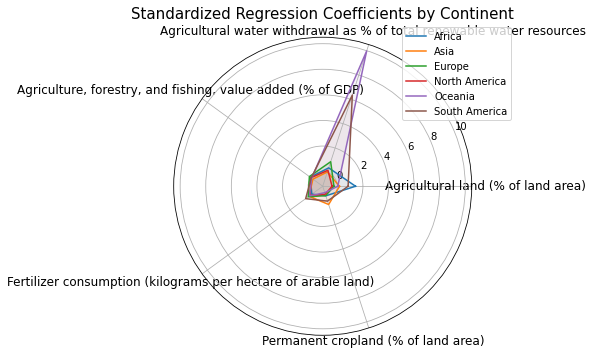

In [12]:
continent_names = []
coefs_matrix = []

for item in results:
    continent_names.append(item['Continent'])
    coefs_matrix.append(item['Coef'])

coefs_matrix = np.array(coefs_matrix)

coef_df = pd.DataFrame(coefs_matrix, columns=x_cols, index=continent_names)
print(coef_df)

def plot_radar(df, feature_labels, title=""):
    N = len(feature_labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # draw radar charts for each continent
    for idx, row in df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.08)

    ax.set_thetagrids(np.degrees(angles[:-1]), feature_labels, fontsize=12)
    plt.title(title, size=15)
    plt.legend(loc='best', bbox_to_anchor=(1.15, 1.05))
    plt.tight_layout()
    plt.show()

plot_radar(coef_df, x_cols, title="Standardized Regression Coefficients by Continent")


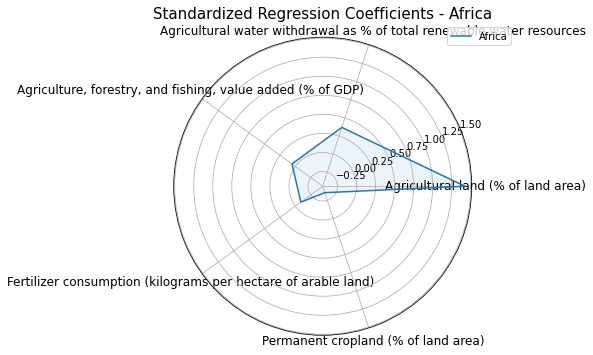

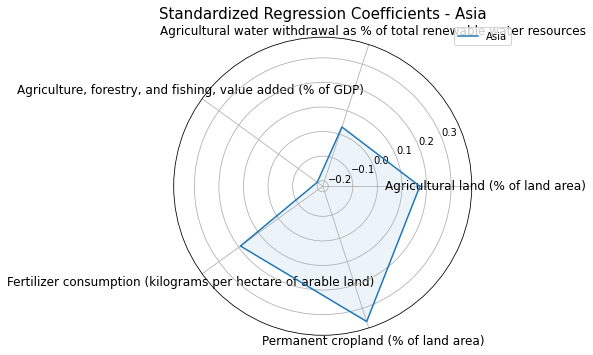

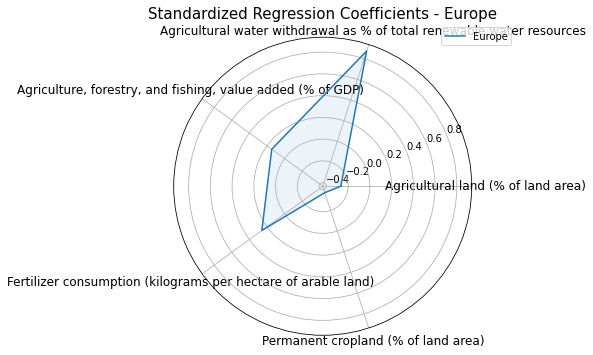

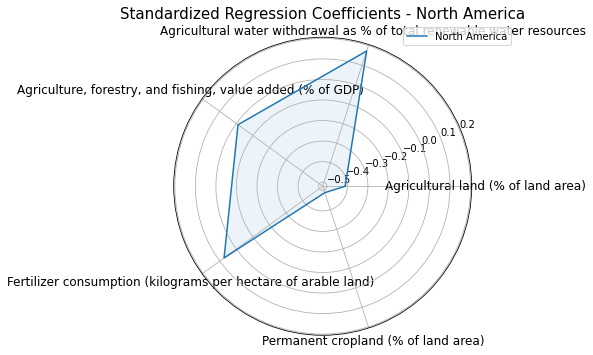

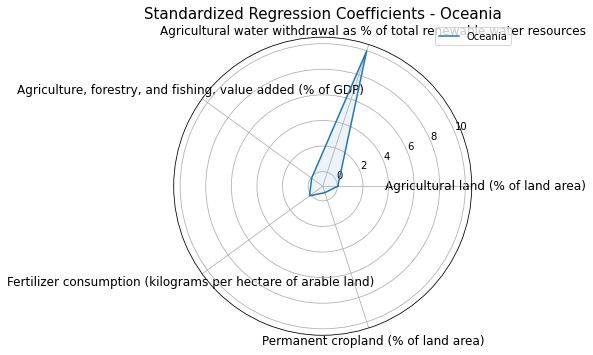

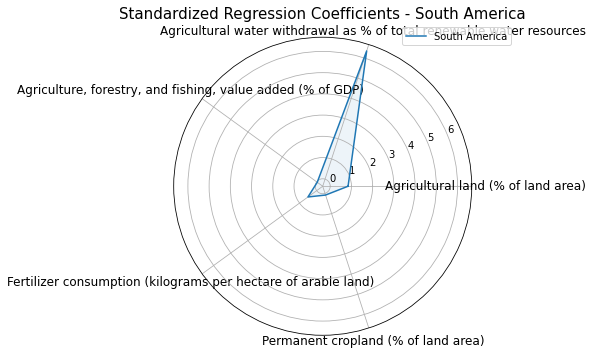

In [13]:
# separate for each continent
for idx, row in coef_df.iterrows():
    plot_radar(pd.DataFrame([row], index=[idx]), x_cols, title=f"Standardized Regression Coefficients - {idx}")

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# test for VIF

vif_data = pd.DataFrame()
vif_data["feature"] = x_cols
vif_data["VIF"] = [variance_inflation_factor(df[x_cols].values, i) for i in range(len(x_cols))]
print(vif_data)


                                             feature       VIF
0                 Agricultural land (% of land area)  1.355016
1  Agricultural water withdrawal as % of total re...  1.270798
2  Agriculture, forestry, and fishing, value adde...  1.927852
3  Fertilizer consumption (kilograms per hectare ...  3.879979
4                Permanent cropland (% of land area)  3.639354


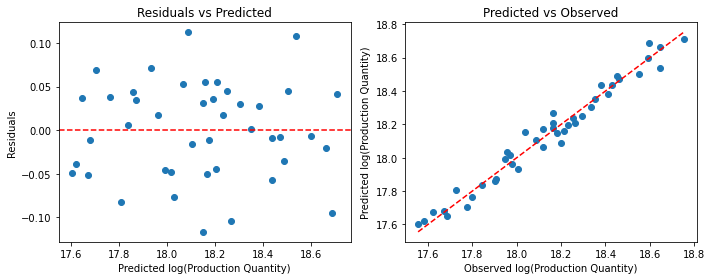

In [15]:
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted log(Production Quantity)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed log(Production Quantity)')
plt.ylabel('Predicted log(Production Quantity)')
plt.title('Predicted vs Observed')

plt.tight_layout()
plt.show()


====== Africa (n=38) ======
Main effect scores: {'Agricultural land (% of land area)': 1.7725974894395664, 'Agricultural water withdrawal as % of total renewable water resources': 0.9727296187724463, 'Agriculture, forestry, and fishing, value added (% of GDP)': 1.4683077094830872, 'Fertilizer consumption (kilograms per hectare of arable land)': 0.30889987819993064, 'Permanent cropland (% of land area)': 1.5428006959547877}
R² (Poly2): 0.9732

====== Asia (n=38) ======
Main effect scores: {'Agricultural land (% of land area)': 1.18369051923982, 'Agricultural water withdrawal as % of total renewable water resources': 1.2284422231708765, 'Agriculture, forestry, and fishing, value added (% of GDP)': 0.3228033492673231, 'Fertilizer consumption (kilograms per hectare of arable land)': 0.4733478360786912, 'Permanent cropland (% of land area)': 0.22207647525881752}
R² (Poly2): 0.9954

====== Europe (n=38) ======
Main effect scores: {'Agricultural land (% of land area)': 1.398482742385053, 'Agr

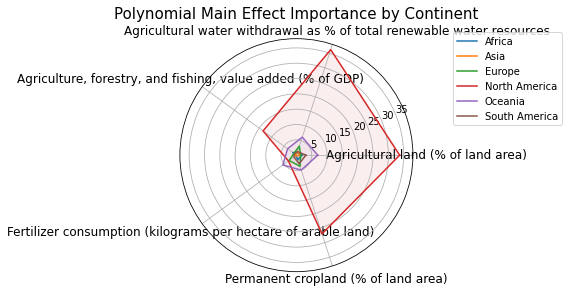

In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv('regression.csv')
x_cols = [
    'Agricultural land (% of land area)',
    'Agricultural water withdrawal as % of total renewable water resources',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Fertilizer consumption (kilograms per hectare of arable land)',
    'Permanent cropland (% of land area)'
]
y_col = 'Production Quantity (tonnes)'
columns_needed = ['Country Name'] + x_cols + [y_col]
df = df[columns_needed].dropna()
df = df[df[y_col] > 0]
df[y_col] = np.log(df[y_col])

# standardize
df_scaled_list = []
for continent, sub_df in df.groupby('Country Name'):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(sub_df[x_cols])
    sub_df_scaled = sub_df.copy()
    sub_df_scaled[x_cols] = X_scaled
    df_scaled_list.append(sub_df_scaled)
df_scaled = pd.concat(df_scaled_list, axis=0).sort_index()

# polynomial regression and main effect importance scores
continents = df_scaled['Country Name'].unique()
all_main_effect_scores = {}

for continent in continents:
    sub_df = df_scaled[df_scaled['Country Name'] == continent]
    if len(sub_df) < len(x_cols) + 3:
        print(f"[{continent}] data is insufficient")
        continue
    X = sub_df[x_cols].values
    y = sub_df[y_col].values

    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names(x_cols)

    model = LinearRegression()
    model.fit(X_poly, y)
    coefs = model.coef_

    # main effect importance scores
    main_effect_score = []
    for v in x_cols:
        related = [i for i, f in enumerate(feature_names) if v in f]
        score = np.sum(np.abs(coefs[related]))
        main_effect_score.append(score)
    all_main_effect_scores[continent] = main_effect_score

    print(f"====== {continent} (n={len(sub_df)}) ======")
    print("Main effect scores:", dict(zip(x_cols, main_effect_score)))
    print(f"R² (Poly2): {model.score(X_poly, y):.4f}\n")

scores_df = pd.DataFrame(all_main_effect_scores, index=x_cols).T
print(scores_df)

# function for radar plotting
def plot_radar(df, feature_labels, title=""):
    N = len(feature_labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    for idx, row in df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.08)

    ax.set_thetagrids(np.degrees(angles[:-1]), feature_labels, fontsize=12)
    plt.title(title, size=15)
    plt.legend(loc='best', bbox_to_anchor=(1.15, 1.05))
    plt.tight_layout()
    plt.show()

plot_radar(scores_df, x_cols, title="Polynomial Main Effect Importance by Continent")


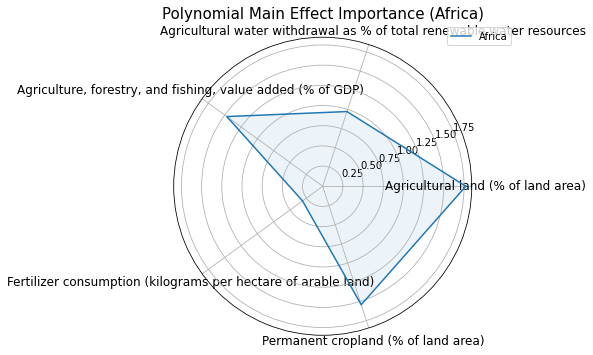

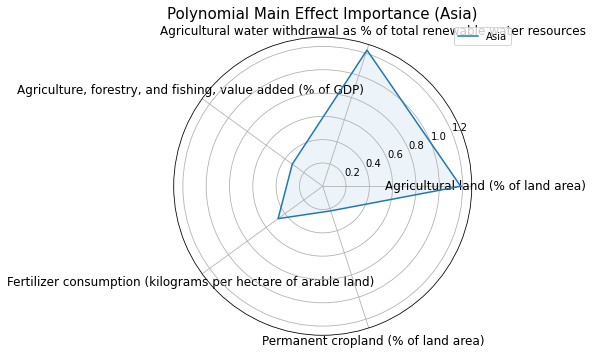

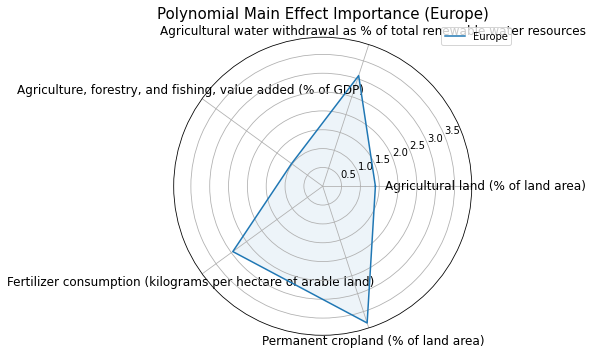

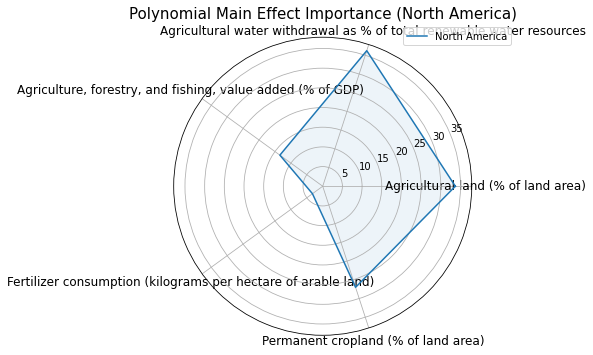

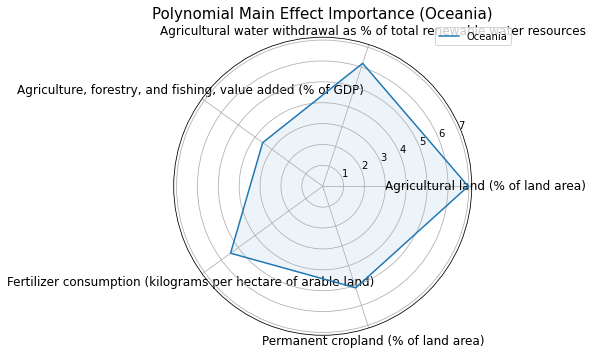

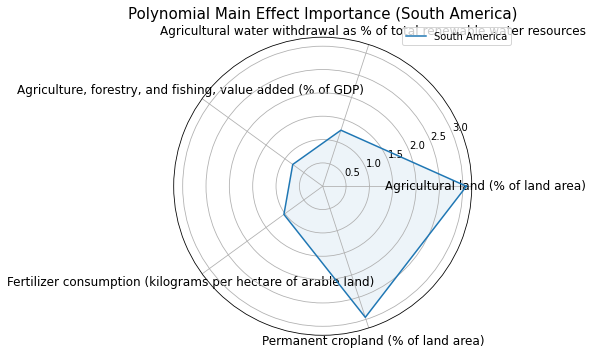

In [18]:
# separate for each continent
for idx, row in scores_df.iterrows():
    plot_radar(
        pd.DataFrame([row], index=[idx]),
        x_cols,
        title=f"Polynomial Main Effect Importance ({idx})"
    )

In [19]:
# save as json
scores_df.to_json("main_effect_scores.json", orient="index")